<a href="https://colab.research.google.com/github/sahriahs/pa-kb/blob/master/Klasifikasi_Tumor_Otak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
100% 86.8M/86.8M [00:02<00:00, 42.5MB/s]
100% 86.8M/86.8M [00:02<00:00, 33.3MB/s]


In [2]:
!unzip brain-tumor-classification-mri.zip

Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  infl

In [3]:
!unzip -j addtonotumor -d Training/no_tumor

Archive:  addtonotumor.zip
  inflating: Training/no_tumor/Tr-no_0010.jpg  
  inflating: Training/no_tumor/Tr-no_0011.jpg  
  inflating: Training/no_tumor/Tr-no_0012.jpg  
  inflating: Training/no_tumor/Tr-no_0013.jpg  
  inflating: Training/no_tumor/Tr-no_0014.jpg  
  inflating: Training/no_tumor/Tr-no_0015.jpg  
  inflating: Training/no_tumor/Tr-no_0016.jpg  
  inflating: Training/no_tumor/Tr-no_0017.jpg  
  inflating: Training/no_tumor/Tr-no_0018.jpg  
  inflating: Training/no_tumor/Tr-no_0019.jpg  
  inflating: Training/no_tumor/Tr-no_0020.jpg  
  inflating: Training/no_tumor/Tr-no_0021.jpg  
  inflating: Training/no_tumor/Tr-no_0022.jpg  
  inflating: Training/no_tumor/Tr-no_0023.jpg  
  inflating: Training/no_tumor/Tr-no_0024.jpg  
  inflating: Training/no_tumor/Tr-no_0025.jpg  
  inflating: Training/no_tumor/Tr-no_0026.jpg  
  inflating: Training/no_tumor/Tr-no_0027.jpg  
  inflating: Training/no_tumor/Tr-no_0028.jpg  
  inflating: Training/no_tumor/Tr-no_0029.jpg  
  inflating: 

In [4]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 25.9 MB/s eta 0:00:00


# Import Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import seaborn as sns
import visualkeras
import pandas as pd
import os
import cv2
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading Data

In [6]:
xtrain = []
ytrain = []
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']


image_size = 255
for i in labels:
    folderPath = os.path.join('Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img_path = os.path.join(folderPath,j)
        img = cv2.imread(img_path)

        # Check if image loaded successfully
        if img is not None:
            img = cv2.resize(img,(image_size, image_size))
            xtrain.append(img)
            ytrain.append(i)
        else:
            print(f"Failed to load image: {img_path}")  # Print error message

for i in labels:
    folderPath = os.path.join('Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img_path = os.path.join(folderPath,j)
        img = cv2.imread(img_path)

        # Check if image loaded successfully
        if img is not None:
            img = cv2.resize(img,(image_size,image_size))
            xtrain.append(img)
            ytrain.append(i)
        else:
            print(f"Failed to load image: {img_path}") # Print error message

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

100%|██████████| 74/74 [00:00<00:00, 305.27it/s]


In [7]:
xtrain.shape

(3655, 255, 255, 3)

In [8]:
ytrain.shape

(3655,)

In [9]:
label_counts = {label: np.sum(ytrain == label) for label in labels}
label_counts

{'glioma_tumor': 926,
 'no_tumor': 891,
 'meningioma_tumor': 937,
 'pituitary_tumor': 901}

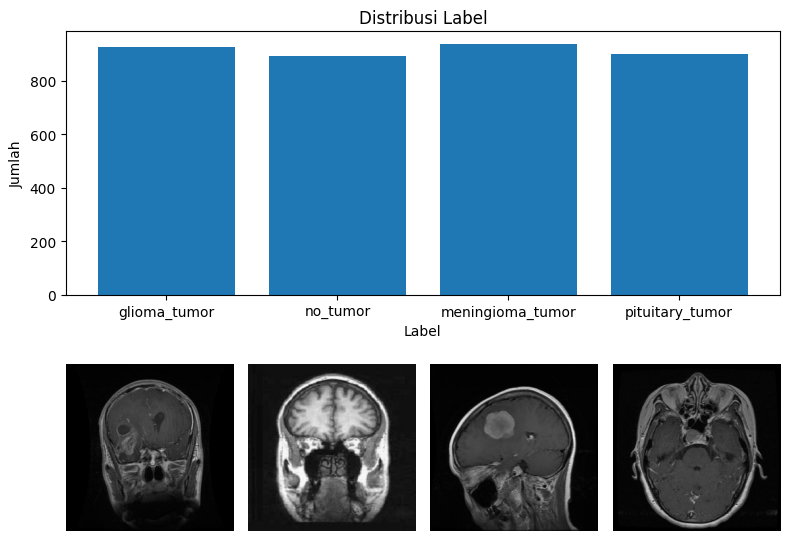

In [10]:
# Plot the bar plot and sample images in one chart
plt.figure(figsize=(8, 6))

# colors = ["C0", "C1", "C2", "C3"]

# Plot the histogram
plt.subplot(2, 1, 1)
bars = plt.bar(label_counts.keys(), label_counts.values())

plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Distribusi Label')

# Plot sample images dari masing-masing label
k = 0
for i in labels:
    j = 0
    while True:
        if ytrain[j] == i:
            plt.subplot(2, 4, k + 5)
            plt.imshow(xtrain[j])
            plt.axis('off')
            k += 1
            break
        j += 1

plt.tight_layout()
plt.show()

# Train Test Split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.10)

In [12]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3289, 255, 255, 3)
(366, 255, 255, 3)
(3289,)
(366,)


## Label categorization

In [13]:
ytrain_new = []
ytest_new = []

for data in ytrain:
    ytrain_new.append(labels.index(data))
ytrain = ytrain_new
ytrain = tf.keras.utils.to_categorical(ytrain)

for data in ytest:
    ytest_new.append(labels.index(data))

ytest = ytest_new
ytest = tf.keras.utils.to_categorical(ytest)

In [14]:
for i in range(4):
    print(ytrain[i], ytest[i])

[0. 0. 0. 1.] [0. 0. 1. 0.]
[0. 0. 1. 0.] [0. 0. 1. 0.]
[0. 0. 1. 0.] [0. 0. 1. 0.]
[0. 0. 0. 1.] [1. 0. 0. 0.]


## Define Convolutional Neural Network

In [15]:
my_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(image_size, image_size, 3), activation='relu', name='Conv1'),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling1'),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='Conv2'),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2) , name='MaxPooling2'),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name='Conv3'),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling3'),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', name='Conv4'),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling4'),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', name='Conv5'),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='MaxPooling5'),

    keras.layers.Flatten(name='Flatten'),
    keras.layers.Dense(256, activation='relu', name='Dense1'),
    keras.layers.Dropout(0.3, name='Dropout1'),
    keras.layers.Dense(256, activation='relu', name='Dense2'),
    keras.layers.Dropout(0.3, name='Dropout2'),
    keras.layers.Dense(128, activation='relu', name='Dense3'),
    keras.layers.Dropout(0.3, name='Dropout3'),
    keras.layers.Dense(4, activation='softmax', name='Output')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling1 (MaxPooling2D)           │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling2 (MaxPooling2D)           │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling3 (MaxPooling2D)           │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling4 (MaxPooling2D)           │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv5 (Conv2D)                       │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling5 (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout1 (Dropout)                   │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout2 (Dropout)                   │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense3 (Dense)                       │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout3 (Dropout)                   │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,437,252 (13.11 MB)

 Trainable params: 3,437,252 (13.11 MB)

 Non-trainable params: 0 (0.00 B)

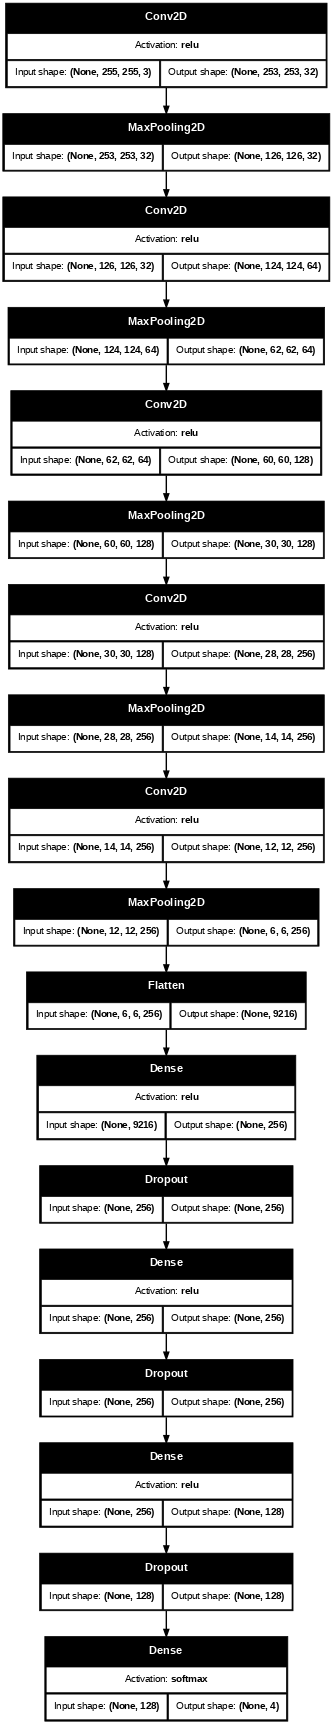

In [17]:
tf.keras.utils.plot_model(
    my_model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    show_layer_activations=True,
    dpi=50
)

## Using Callbacks

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2
)

## Model Compling

In [20]:
my_model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    # optimizer=keras.optimizers.Adam(),
    optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

## Fit model

In [21]:
hist = my_model.fit(
    xtrain,
    ytrain,
    epochs=50,
    validation_split=0.15,
    batch_size=64,
    callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 52s 613ms/step - accuracy: 0.2753 - loss: 22.4396 - val_accuracy: 0.4069 - val_loss: 1.2602 - learning_rate: 0.0010
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.4262 - loss: 1.2738 - val_accuracy: 0.5324 - val_loss: 1.1014 - learning_rate: 0.0010
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.4911 - loss: 1.1667 - val_accuracy: 0.5385 - val_loss: 1.1289 - learning_rate: 0.0010
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.5649 - loss: 1.0273 - val_accuracy: 0.6134 - val_loss: 0.9685 - learning_rate: 0.0010
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.6246 - loss: 0.9375 - val_accuracy: 0.6943 - val_loss: 0.7392 - learning_rate: 0.0010
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.6857 - loss: 0.7789 - val_accuracy: 0.7045 - val_loss: 0.7192 - learning_rate: 0.0010
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 0.7396 - loss: 0.6

## Model Evaluation

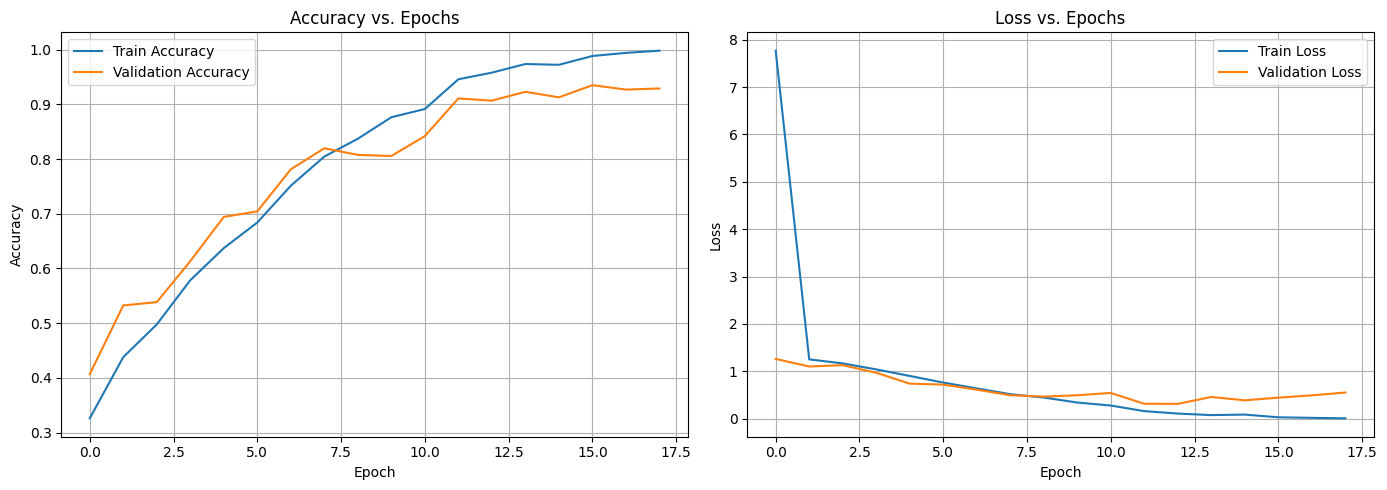

In [22]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Buat grafik Loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
# evaluation = my_model.evaluate(xtest, ytest, verbose=0)
# metrics = ['Loss', 'Accuracy', 'Precision', 'Recall', 'AUC']
# for i in range(5):
#     print(f'{metrics[i]}: {evaluation[i]}')

evaluation = my_model.evaluate(xtest, ytest, verbose=0)
metrics = ['Loss', 'Accuracy'] # Only include Loss and Accuracy
for i in range(len(evaluation)): # Iterate based on the length of evaluation list
    print(f'{metrics[i]}: {evaluation[i]}')

Loss: 0.2802776098251343
Accuracy: 0.9207650423049927


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


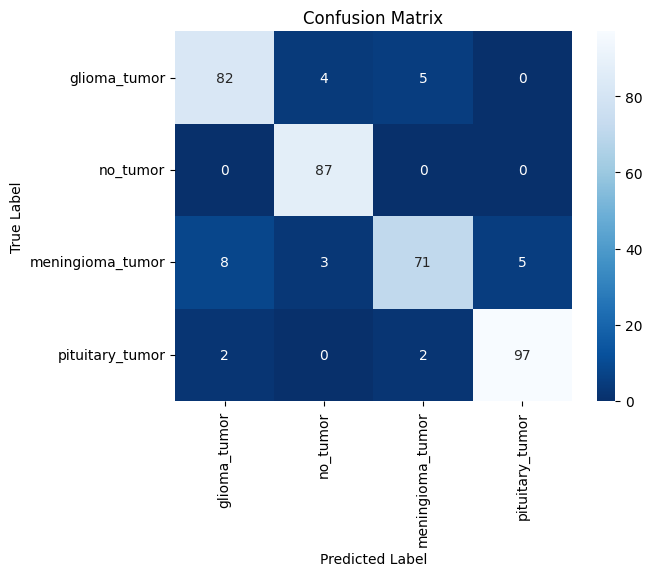

In [26]:
ytrue = np.argmax(ytest, axis=1)
prediction = np.argmax(my_model.predict(xtest), axis=1)

heatmap = sns.heatmap(confusion_matrix(ytrue,prediction), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
print(classification_report(ytrue, prediction))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        91
           1       0.93      1.00      0.96        87
           2       0.91      0.82      0.86        87
           3       0.95      0.96      0.96       101

    accuracy                           0.92       366
   macro avg       0.92      0.92      0.92       366
weighted avg       0.92      0.92      0.92       366



In [28]:
Results = pd.DataFrame(hist.history)

In [29]:
Results.describe()

,accuracy,loss,val_accuracy,val_loss,learning_rate
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.786345,0.865997,0.777328,0.637971,0.000757
std,0.212791,1.771507,0.161937,0.289325,0.000328
min,0.325939,0.006800,0.406883,0.312314,0.000125
25%,0.648927,0.091468,0.696862,0.459572,0.000500
50%,0.856887,0.393206,0.813765,0.518686,0.001000
75%,0.968873,0.866791,0.912449,0.734212,0.001000
max,0.998211,7.767252,0.935223,1.260172,0.001000
